# MOVIES RECOMMENDATION SYSTEM 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
movie_ids_titles=pd.read_csv("movies.csv")

movie_ids_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
movie_ids_titles.shape

(9742, 3)

In [17]:
movie_ids_ratings=pd.read_csv("ratings.csv")

movie_ids_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
movie_ids_ratings.shape

(100836, 4)

Data Preprocessing. we need a dataframe that consist of userid, movieid, titles and ratings 

In [19]:
movie_ids_titles.drop(['genres'],inplace=True,axis=1)

movie_ids_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [20]:
movie_ids_ratings.drop(['timestamp'],inplace=True,axis=1)
movie_ids_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [21]:
merged_movie_df= pd.merge(movie_ids_ratings, movie_ids_titles, on='movieId')
merged_movie_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


Data Visualization- let's friest group the database by title and see what information we get regarding ratings of movies

In [22]:
merged_movie_df.groupby('title').describe()

userId                          \
                                           count        mean         std   
title                                                                      
'71 (2014)                                   1.0  610.000000         NaN   
'Hellboy': The Seeds of Creation (2004)      1.0  332.000000         NaN   
'Round Midnight (1986)                       2.0  354.500000   31.819805   
'Salem's Lot (2004)                          1.0  345.000000         NaN   
'Til There Was You (1997)                    2.0  229.000000  164.048773   
...                                          ...         ...         ...   
eXistenZ (1999)                             22.0  389.954545  167.161022   
xXx (2002)                                  24.0  272.916667  174.297576   
xXx: State of the Union (2005)               5.0  386.000000  148.801882   
¡Three Amigos! (1986)                       26.0  279.807692  193.794947   
À nous la liberté (Freedom for Us) (1931)    1.0  527.000000         NaN   

                                                                         \
                                             min     25%    50%     75%   
title                                                                     
'71 (2014)                                 610.0  610.00  610.0  610.00   
'Hellboy': The Seeds of Creation (2004)    332.0  332.00  332.0  332.00   
'Round Midnight (1986)                     332.0  343.25  354.5  365.75   
'Salem's Lot (2004)                        345.0  345.00  345.0  345.00   
'Til There Was You (1997)                  113.0  171.00  229.0  287.00   
...                                          ...     ...    ...     ...   
eXistenZ (1999)                             95.0  278.25  419.5  509.25   
xXx (2002)                                   9.0  131.25  240.5  418.50   
xXx: State of the Union (2005)             232.0  274.00  382.0  432.00   
¡Three Amigos! (1986)                        1.0  101.25  260.5  441.25   
À nous la liberté (Freedom for Us) (1931)  527.0  527.00  527.0  527.00   

                                                 movieId            ...  \
                                             max   count      mean  ...   
title                                                               ...   
'71 (2014)                                 610.0     1.0  117867.0  ...   
'Hellboy': The Seeds of Creation (2004)    332.0     1.0   97757.0  ...   
'Round Midnight (1986)                     377.0     2.0   26564.0  ...   
'Salem's Lot (2004)                        345.0     1.0   27751.0  ...   
'Til There Was You (1997)                  345.0     2.0     779.0  ...   
...                                          ...     ...       ...  ...   
eXistenZ (1999)                            608.0    22.0    2600.0  ...   
xXx (2002)                                 610.0    24.0    5507.0  ...   
xXx: State of the Union (2005)             610.0     5.0   33158.0  ...   
¡Three Amigos! (1986)                      599.0    26.0    2478.0  ...   
À nous la liberté (Freedom for Us) (1931)  527.0     1.0    5560.0  ...   

                                                              rating  \
                                                75%       max  count   
title                                                                  
'71 (2014)                                 117867.0  117867.0    1.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0    1.0   
'Round Midnight (1986)                      26564.0   26564.0    2.0   
'Salem's Lot (2004)                         27751.0   27751.0    1.0   
'Til There Was You (1997)                     779.0     779.0    2.0   
...                                             ...       ...    ...   
eXistenZ (1999)                              2600.0    2600.0   22.0   
xXx (2002)                                   5507.0    5507.0   24.0   
xXx: State of the Union (2005)              33158.0   33158.0    5.0   
¡Three Amig

In [23]:
merged_movie_df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

let's sort the movies titles by the desending order of the average user ratings

In [24]:
merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

Let's now print the movies in the descending order of their ratings counts

In [25]:
merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

A movie rated by larger number of people is usually a good movie
Let's create a database that show the title, mean rating and rating counts.

In [26]:
movie_rating_mean_count= pd.DataFrame(columns=['rating.mean','rating.count'])
movie_rating_mean_count["rating.mean"]=merged_movie_df.groupby('title')['rating'].mean()
movie_rating_mean_count["rating.count"]=merged_movie_df.groupby('title')['rating'].count()
movie_rating_mean_count.head()

,rating.mean,rating.count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


The above DataFrame contain the movie titles, average ratings (ratings mean) and the numbers of rating_counts 
We will plot a histogram to see hoe the average are distrubuted.

<Axes: >

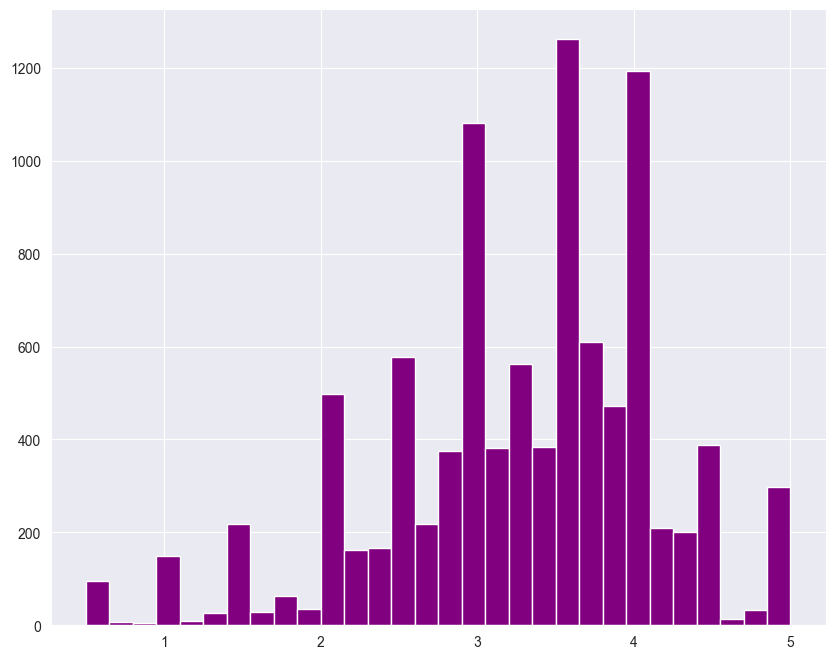

In [27]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count['rating.mean'].hist(bins=30, color='purple')

In the above plot, most of the movies have average ratings between 3 and 4 
Destribution for rating counts

<Axes: >

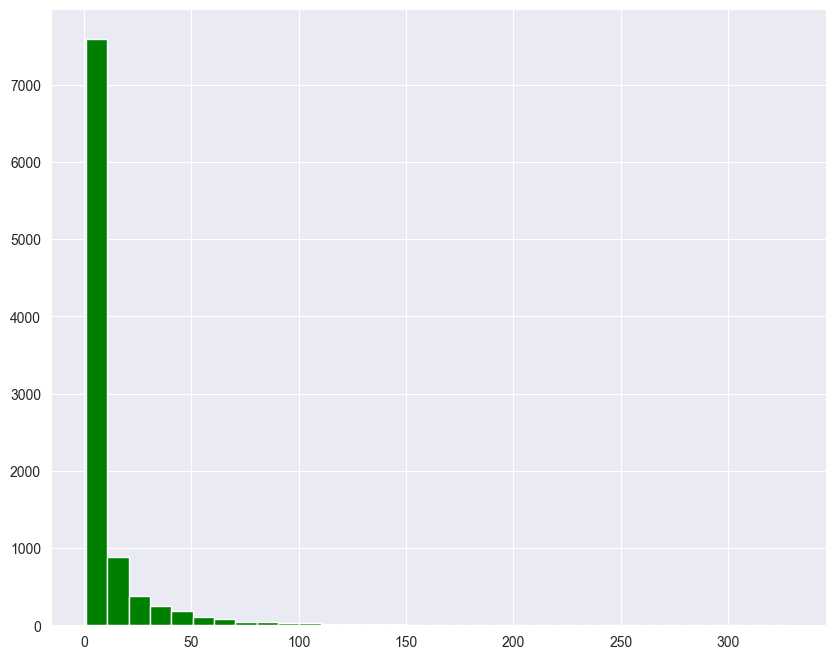

In [28]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count["rating.count"].hist(bins=33, color="green")

Their is around 7000 movies with less than 10 rating counts. The number of movies decrease with an increase in rating counts.
Movie with more than 50 rating are very few.

It is also intresting to see the relationship between mean ratings and ratings counts of the movie

<Axes: xlabel='rating.mean', ylabel='rating.count'>

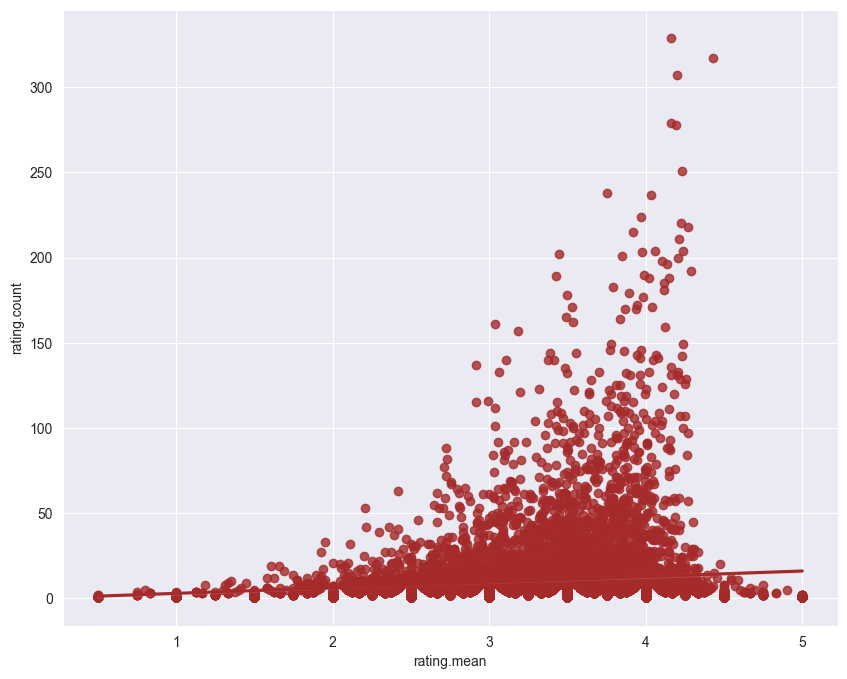

In [29]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

sns.regplot(x="rating.mean",y="rating.count",data=movie_rating_mean_count, color="brown")

From the above graph in the top right position, you can see the movies with the higher number of rating counts tend to have higher mean
ratings as well. Let's sort our Data by ratings counts and see the average ratings of the movie with the top 5 highest number of ratings

In [30]:
movie_rating_mean_count.sort_values('rating.count',ascending=False).head()

,rating.mean,rating.count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


# Item Based Collabrative Filtering

In the item Based collabrative filtering. Products are recommended on based on common characteristics.
The step is to create a database where each movie represented by a column and rows contain user rating for movie

In [31]:
user_movie_rating_matrix= merged_movie_df.pivot_table(index="userId",columns="title",values="rating")
user_movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [32]:
user_movie_rating_matrix.shape

(610, 9719)

The Dataset contain 610 unique users and 9,719 unique movies
Now we will find movies recommendation based on a singlr movie and then based on multiple movies.
Findind recommendation based on single movie- Support we want to find recommendation base don the movies pulp Fiction.
First we will filter the columns that contains the user ratings for the movie.


In [33]:
pulp_fiction_ratings= user_movie_rating_matrix["Pulp Fiction (1994)"]

Next, we will find the correlation between the user ratins of all the movies and user ratings for the pulp fiction

In [34]:
pulp_fiction_correlations=pd.DataFrame(user_movie_rating_matrix.corrwith(pulp_fiction_ratings),columns=["pf_corr"])

c:\Users\Shradha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Shradha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Shradha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\Shradha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Shradha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [35]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head(5)

,pf_corr
title,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0
Azumi (2003),1.0
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0
"War Zone, The (1999)",1.0
"Wolfman, The (2010)",1.0


Correlation itself is not giving meaningfull result, one solution to this problem can be that in addition to the correlation between the movie
we also use ratings counts, for the correlated movie as the criteria for the finding the best recommendion

In [36]:
pulp_fiction_correlations=pulp_fiction_correlations.join(movie_rating_mean_count["rating.count"], rsuffix='mean_count')

pulp_fiction_correlations.head()

,pf_corr,rating.count
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2


In [40]:
pulp_fiction_correlations.drop(['rating.countmean_count'],inplace=True,axis=1)
pulp_fiction_correlations.head()

KeyError: "['rating.countmean_count'] not found in axis"

The pf_corr columns contains some NaN values. This is because there can be movies that are rated by user who did not rate Pulp fiction (1994).
In sush cases, correlation will be null

We will remove all the movies with Null correlation with pulp fiction(1994)

In [41]:
pulp_fiction_correlations.dropna(inplace=True)

In [42]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating.count
title,,
Rare Exports: A Christmas Tale (Rare Exports) (2010),1.0,2
Azumi (2003),1.0,2
"Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)",1.0,2
"War Zone, The (1999)",1.0,2
"Wolfman, The (2010)",1.0,2


A better way to find the movies with the rating count of atleast 50 and having the highest correlation with pupulp  fiction(199)


In [43]:
pulp_fiction_correlations_50=pulp_fiction_correlations[pulp_fiction_correlations['rating.count']>50]

pulp_fiction_correlations_50.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating.count
title,,
Pulp Fiction (1994),1.000000,307
"Wolf of Wall Street, The (2013)",0.579915,54
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73


Finding the recommendation based on multiple movies. In this we will see how t recommend  movie that to a user based on his ratings of multiple moves.
The first step is to create a dataframe, which contains a correlations between all the movies in our dataset in the forms of a matrix.

In [40]:
all_movies_correlations=user_movie_rating_matrix.corr(method="pearson",min_periods=50)

In [41]:
all_movies_correlations.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now supose the new user log into website. the user alredy watched 3 movies and has given rating to those movies.

In [42]:
movie_data=[['Forest Gump (1994)',4.0],['Fight Club (1999)',3.5],['Instestallar (2014)',4.0]]
test_movies=pd.DataFrame(movie_data,columns=["Movie_Name","Movie_Rating"])
test_movies.head()

,Movie_Name,Movie_Rating
0,Forest Gump (1994),4.0
1,Fight Club (1999),3.5
2,Instestallar (2014),4.0


We will recommending the movies from our dataset based on the ratings by a new user for these tree movies

In [43]:
print(test_movies['Movie_Name'][0])
print(test_movies['Movie_Rating'][0])

Forest Gump (1994)
4.0


From all_movie_correlations dataframe, Let's obtain correlation values for the movie related to Forest Gump (1994)

In [44]:
all_movies_correlations['Forrest Gump (1994)'].dropna()

title
2001: A Space Odyssey (1968)                  0.191558
300 (2007)                                    0.321523
40-Year-Old Virgin, The (2005)                0.156517
Ace Ventura: Pet Detective (1994)             0.137870
Ace Ventura: When Nature Calls (1995)         0.421868
                                                ...   
Willy Wonka & the Chocolate Factory (1971)    0.195081
Wizard of Oz, The (1939)                      0.162368
X-Men (2000)                                  0.200786
X2: X-Men United (2003)                       0.246717
Young Frankenstein (1974)                     0.230049
Name: Forrest Gump (1994), Length: 313, dtype: float64

Next we will itrate through the tree movies in the test movie_dataframe, find the correlated movies,
and then multiplies the correlation of all the coreelated movies eith the atings of the input movies.

The correlated movies, along with weighted correlation are appended to an empty series named recommended movie

In [45]:
#recommended_movies=pd.Series(dtype='float64')

#for i in range(0,2):
#    movie=all_movies_correlations[test_movies["Movie_Name"][i]].dropna()
#    movie=movie.map(lambda movie_corr: movie_corr*test_movies["Movie_Rating"][i])
#    recommended_movies=recommended_movies.append(movie)
import pandas as pd

recommended_movies = pd.Series(dtype='float64')

for i in range(2):
    movie_name = test_movies["Movie_Name"][i]
    if movie_name in all_movies_correlations:
        movie = all_movies_correlations[movie_name].dropna()
        movie = movie.map(lambda movie_corr: movie_corr * test_movies["Movie_Rating"][i])
        recommended_movies = pd.concat([recommended_movies, movie])  # Concatenate the Series
    else:
        print(f"Movie '{movie_name}' not found in all_movies_correlations.")

# Additional debugging checks
print("Recommended Movies:")
print(recommended_movies)



Movie 'Forest Gump (1994)' not found in all_movies_correlations.
Recommended Movies:
2001: A Space Odyssey (1968)                  0.130493
300 (2007)                                    1.313501
40-Year-Old Virgin, The (2005)                0.208894
Ace Ventura: Pet Detective (1994)             0.871436
Airplane! (1980)                             -0.381053
                                                ...   
Who Framed Roger Rabbit? (1988)               0.874334
Willy Wonka & the Chocolate Factory (1971)    0.663971
Wizard of Oz, The (1939)                     -0.971160
X-Men (2000)                                 -0.063318
X2: X-Men United (2003)                      -0.661265
Length: 216, dtype: float64


In [46]:
#recommended_movies = pd.Series(dtype='float64')

#for i in range(2):
#    movie_name = test_movies["Movie_Name"][i]

#    try:
#        movie = all_movies_correlations[movie_name].dropna()
#        movie = movie.map(lambda movie_corr: movie_corr * test_movies["Movie_Rating"][i])
#        recommended_movies = recommended_movies.append(movie)
#    except KeyError:
#        print(f'Movie "{movie_name}" not found in all_movies_correlations.')
import pandas as pd

recommended_movies = pd.Series(dtype='float64')

for i in range(2):
    movie_name = test_movies["Movie_Name"][i]

    try:
        movie = all_movies_correlations[movie_name].dropna()
        movie = movie.map(lambda movie_corr: movie_corr * test_movies["Movie_Rating"][i])
        recommended_movies = pd.concat([recommended_movies, movie])
    except KeyError:
        print(f'Movie "{movie_name}" not found in all_movies_correlations.')

# Additional debugging checks
print("Recommended Movies:")
print(recommended_movies)


Movie "Forest Gump (1994)" not found in all_movies_correlations.
Recommended Movies:
2001: A Space Odyssey (1968)                  0.130493
300 (2007)                                    1.313501
40-Year-Old Virgin, The (2005)                0.208894
Ace Ventura: Pet Detective (1994)             0.871436
Airplane! (1980)                             -0.381053
                                                ...   
Who Framed Roger Rabbit? (1988)               0.874334
Willy Wonka & the Chocolate Factory (1971)    0.663971
Wizard of Oz, The (1939)                     -0.971160
X-Men (2000)                                 -0.063318
X2: X-Men United (2003)                      -0.661265
Length: 216, dtype: float64


In [47]:
recommended_movies 

2001: A Space Odyssey (1968)                  0.130493
300 (2007)                                    1.313501
40-Year-Old Virgin, The (2005)                0.208894
Ace Ventura: Pet Detective (1994)             0.871436
Airplane! (1980)                             -0.381053
                                                ...   
Who Framed Roger Rabbit? (1988)               0.874334
Willy Wonka & the Chocolate Factory (1971)    0.663971
Wizard of Oz, The (1939)                     -0.971160
X-Men (2000)                                 -0.063318
X2: X-Men United (2003)                      -0.661265
Length: 216, dtype: float64

to grt final recommendation you can sort the movies in the descending order of whighed correlations

In [48]:
recommended_movies.sort_values(inplace=True, ascending=False)

print(recommended_movies.head(10))

Fight Club (1999)                                                 3.500000
Lock, Stock & Two Smoking Barrels (1998)                          2.570366
Django Unchained (2012)                                           2.225161
Life Is Beautiful (La Vita è bella) (1997)                        2.203741
Pulp Fiction (1994)                                               1.902128
Seven (a.k.a. Se7en) (1995)                                       1.787457
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    1.691103
Memento (2000)                                                    1.684206
Slumdog Millionaire (2008)                                        1.630262
Reservoir Dogs (1992)                                             1.615044
dtype: float64


In [49]:
recommended_movies


Fight Club (1999)                                  3.500000
Lock, Stock & Two Smoking Barrels (1998)           2.570366
Django Unchained (2012)                            2.225161
Life Is Beautiful (La Vita è bella) (1997)         2.203741
Pulp Fiction (1994)                                1.902128
                                                     ...   
X2: X-Men United (2003)                           -0.661265
Harry Potter and the Prisoner of Azkaban (2004)   -0.671788
Psycho (1960)                                     -0.724700
GoldenEye (1995)                                  -0.898027
Wizard of Oz, The (1939)                          -0.971160
Length: 216, dtype: float64